In [62]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths
import pickle

import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
import numpy as np
import cv2

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
def align_faces(img):
    dets = detector(img, 1)
    
    objs = dlib.full_object_detections()

    for detection in dets:
        s = sp(img, detection)
        objs.append(s)
        
    faces = dlib.get_face_chips(img, objs, size=256, padding=0.9)
    
    return faces

In [46]:
predictor = dlib.shape_predictor("./models/shape_predictor_81_face_landmarks.dat")
sp = dlib.shape_predictor('models/shape_predictor_5_face_landmarks.dat')
detector = dlib.get_frontal_face_detector()

In [68]:
imagePaths = list(paths.list_images("img/database/jung"))
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-1][:4]
    print(f"{name}   -   {imagePath}")
    image = cv2.cvtColor(cv2.imread(imagePath), cv2.COLOR_BGR2RGB)
    objs = dlib.full_object_detections()
    faces = dlib.get_face_chips(image, objs, size=256, padding=0.35)
    print(image)
    image = align_faces(image)
    boxes = face_recognition.face_locations(image)
#    padding=[]
#    for t,b,l,r in boxes:
#        t*=4
#        b*=4
#        l*=4
#        r*=4
#        padding.append((t,b,l,r))
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        

data = {"encodings": knownEncodings, "names": knownNames}
f = open("known.bin", "wb")
f.write(pickle.dumps(data))
f.close()

jung   -   img/database/jung\jung0.jpg


RuntimeError: No face were specified in the faces array.

Number of faces detected: 1
[(162, 120) (286, 245)]
Detection 0: Left: 162 Top: 120 Right: 286 Bottom: 245


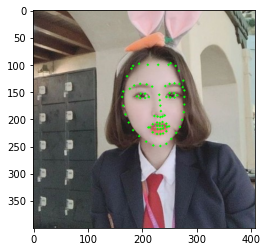

AttributeError: 'list' object has no attribute 'shape'

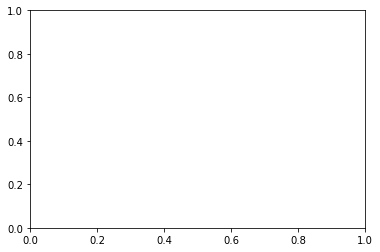

In [48]:
frame = cv2.imread("./img/database/jung/jung18.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
imshow('', frame)
img3_faces = align_faces(frame)
imshow('',img3_faces)

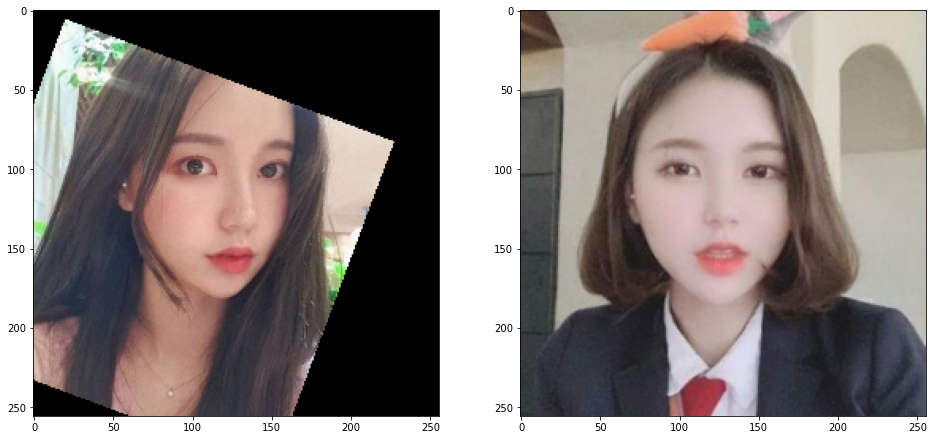

In [63]:
img1 = cv2.cvtColor(cv2.imread("./img/database/jung/jung0.jpg"), cv2.COLOR_BGR2RGB)
img1_faces = align_faces(img1)
img2 = cv2.cvtColor(cv2.imread("./img/database/jung/jung18.jpg"), cv2.COLOR_BGR2RGB)
img2_faces = align_faces(img2)

fig, axes = plt.subplots(1, 2, figsize=(16, 10))
axes[0].imshow(img1_faces[0])
axes[1].imshow(img2_faces[0])

In [38]:
files = os.listdir("img/database/jung")   
print(files)
known_face_encodings = []
known_face_names = []

for filename in files:
            name, ext = os.path.splitext(filename)
            if ext == '.jpg':
                known_face_names.append(name)
                pathname = os.path.join("img/database/jung", filename)
                img = face_recognition.load_image_file(pathname)
                face_encoding = face_recognition.face_encodings(img)[0]
                known_face_encodings.append(face_encoding) 

['jung0.jpg', 'jung18.jpg']


In [39]:
data = pickle.loads(open("known.bin", "rb").read())

imagePaths = list(paths.list_images("img/database"))
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 
 
    names = []
    for encoding in encodings:
        matches = face_recognition.compare_faces(data["encodings"], encoding)
        name = "Unknown"
        face_distances = face_recognition.face_distance(encoding,known_face_encodings)
        best_match_index = np.argmin(face_distances)
        print(face_distances[best_match_index])
        if face_distances[best_match_index] < 0.2:
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]
            counts = {} 
            for i in matchedIdxs:
                name = data["names"][i]
                counts[name] = counts.get(name, 0) + 1 
                print(counts)
                name = max(counts, key=counts.get)
        names.append(name)                             
        for ((top, right, bottom, left), name) in zip(boxes, names):
            if name == "Unknown":
                cv2.rectangle(image, (left, top), (right, bottom), (0,0, 255), 2)
                y = top - 15 if top - 15 > 15 else top + 15
                cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0,0, 255), 2)
            else:
                cv2.rectangle(image, (left, top), (right, bottom), (255,0, 0), 2)
                y = top - 15 if top - 15 > 15 else top + 15
                cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (255,0, 0), 2)

    cv2.imwrite("img/database/result/"+imagePath.split(os.path.sep)[-1],image)

chul   -   img/database\chul\chul0.jpg
0.3806543268864585
0.6546794919691824
chul   -   img/database\chul\chul1.jpg
0.39346098532985063
0.665201866025967
chul   -   img/database\chul\chul10.jpg
0.6841525885747372
0.4888981829760197
chul   -   img/database\chul\chul12.png
0.6758633700267312
chul   -   img/database\chul\chul13.jpg
0.577302985859059
chul   -   img/database\chul\chul14.jpg
0.3752220109939916
0.626825867048181
chul   -   img/database\chul\chul17.jpg
0.7051206560776528
0.4456234596097404
chul   -   img/database\chul\chul18.jpg
0.7063745372285485
chul   -   img/database\chul\chul2.jpg
0.6516517034796017
0.4261215680741945
chul   -   img/database\chul\chul3.jpg
0.6555313157064132
chul   -   img/database\chul\chul6.jpg
0.6879443219459639
0.43414122401428906
chul   -   img/database\chul\chul9.jpg
0.6395098921924178
hye   -   img/database\hye\hye0.jpg
0.3530367895275699
hye   -   img/database\hye\hye1.jpg
0.36546463632465265
hye   -   img/database\hye\hye11.jpg
0.3862732515160864